In [1]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import yfinance as yf

def get_historical_Data(tickers):
    data = pd.DataFrame()
    names = list()
    for i in tickers:
        data = pd.concat([data, pd.DataFrame(yf.download(i, start=datetime(2020, 10, 27), end=datetime(2021, 10, 27)).iloc[:,4])], axis = 1)
        names.append(i)
    data.columns = names
    return data

ticks = ["DPZ", "AAPL", "GOOG", "AMD", "GME", "SPY", "NFLX", "BA", "WMT","TWTR","GS","XOM","NKE", "BRK-B", "MSFT"] #Name of company (Dominos pizza)
d = get_historical_Data(ticks)
print(d.shape)
# Most Recent Data
d.tail()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,DPZ,AAPL,GOOG,AMD,GME,SPY,NFLX,BA,WMT,TWTR,GS,XOM,NKE,BRK-B,MSFT
Date,,,,,,,,,,,,,,,
2021-10-20,452.347168,147.956543,142.414993,116.389999,46.130001,443.629028,625.140015,216.169998,143.164062,65.800003,395.319122,60.136559,156.484451,287.489990,303.240570
2021-10-21,461.599701,148.174622,142.780502,119.330002,45.427502,444.786102,653.159973,214.339996,143.958359,65.400002,395.028351,59.044018,160.168167,286.820007,306.545166
2021-10-22,458.019012,147.391525,138.625000,119.820000,42.450001,444.325226,664.780029,212.970001,145.458618,62.240002,401.550903,59.449013,161.452042,289.239990,304.966797
2021-10-25,459.903046,147.341980,138.772995,122.360001,43.492500,446.708069,671.659973,212.869995,147.145218,62.110001,401.967651,60.607475,162.182877,290.260010,303.950836
2021-10-26,459.449310,148.016037,139.671997,122.930000,44.459999,447.110077,668.520020,209.809998,145.860641,61.430000,404.739502,62.010818,161.758194,290.850006,305.903931


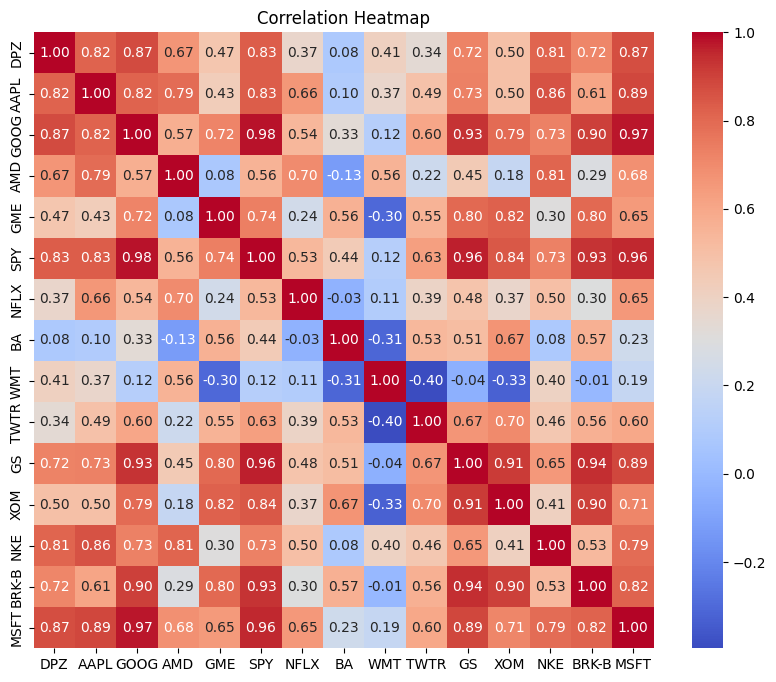

In [2]:
import matplotlib.pyplot as plt
import seaborn as sn
corr = d.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sn.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

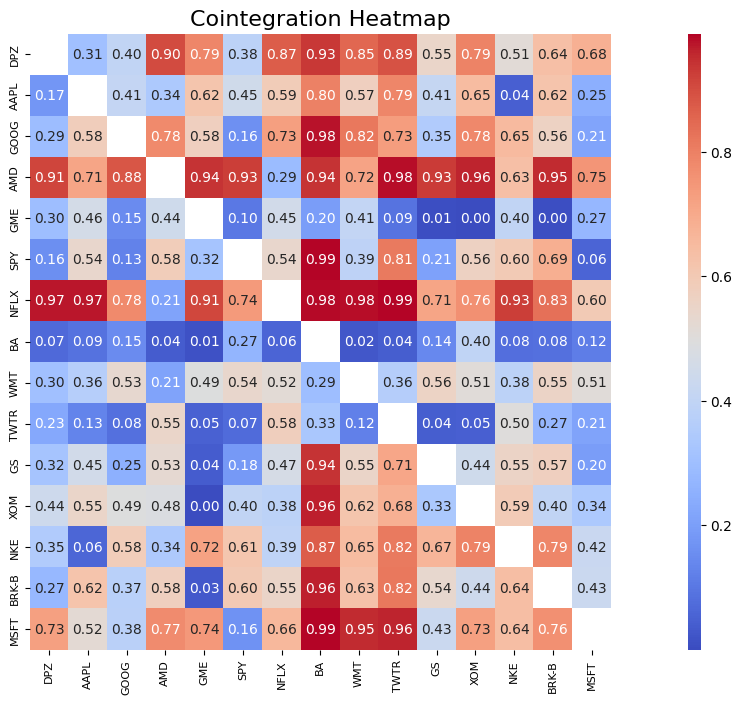

In [8]:
from statsmodels.tsa.stattools import coint

'''
The p-value of the cointegration test tells us the likelihood of obtaining the observed result by chance
if there is no cointegration between the two series.
A small p-value (e.g., less than 0.05) suggests strong evidence of cointegration,
while a large p-value suggests a lack of evidence for cointegration.
'''

coint_vals = pd.DataFrame(index=ticks, columns=ticks)
for i in ticks:
    for j in ticks:
        if i != j:
            result = coint(d[i], d[j])
            coint_vals.loc[i,j] = result[1]
coint_vals = coint_vals.astype(float)

fig, ax = plt.subplots(figsize=(10, 8))
sn.heatmap(coint_vals, cmap='coolwarm', annot=True, fmt=".2f", ax=ax, cbar_kws={'orientation': 'vertical', 'pad': 0.1, 'aspect': 50})
ax.tick_params(axis='both', which='major', labelsize=8)
plt.title('Cointegration Heatmap', fontsize=16)
plt.show()


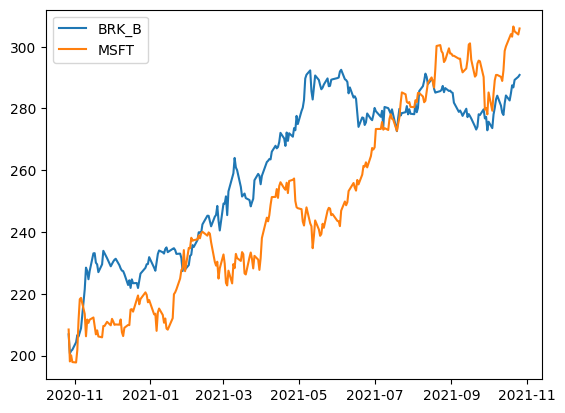

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# df = pd.read_csv("USDCHF.csv")
BRK_B = d["BRK-B"]
GS = d["MSFT"]

plt.plot(BRK_B, label= "BRK_B")
plt.plot(GS, label="MSFT")
plt.legend()
plt.show()
# df["ts"] = pd.to_datetime(df["Unnamed: 0"]) 
# df = df.set_index("ts")
# df = df.resample("H").last()
# df = df.dropna()


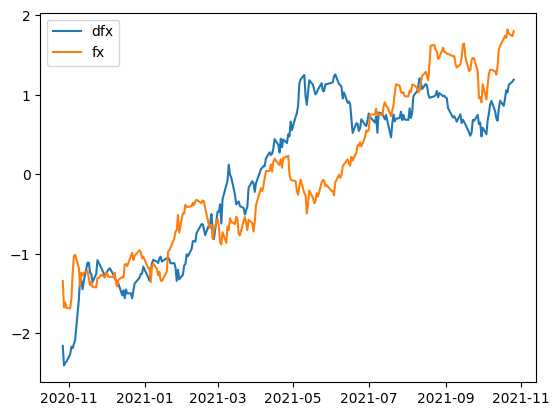

In [5]:


x1=BRK_B
x2=GS



plt.plot((x1 - x1.mean())/x1.std(), label="dfx")
plt.plot((x2 -x2.mean())/x2.std(), label="fx")
plt.legend()
plt.show()

ADF Statistic: -16.192601
p-value: 0.000000


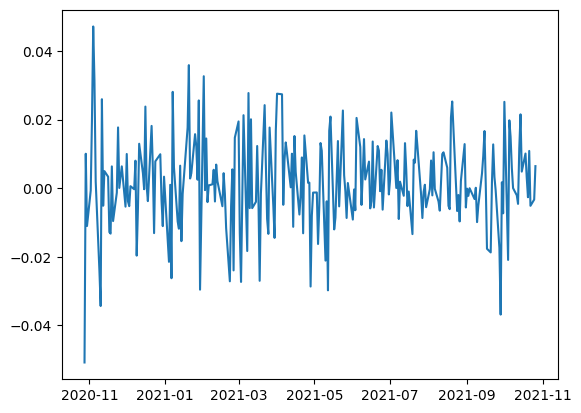

In [6]:
from statsmodels.tsa.stattools import adfuller

def stationarity_test(series): 
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    
    if result[1] > 0.05: # non-stationary
        return False
    else:                # stationary
        return True

# stationarity_test(x1)
# stationarity_test(x2)
# stationarity_test(x1 - x2)
# stationarity_test(x1/x2)
stationarity_test((np.log(x2/x2.shift(1))).dropna())

plt.plot((np.log(x2/x2.shift(1))).dropna())





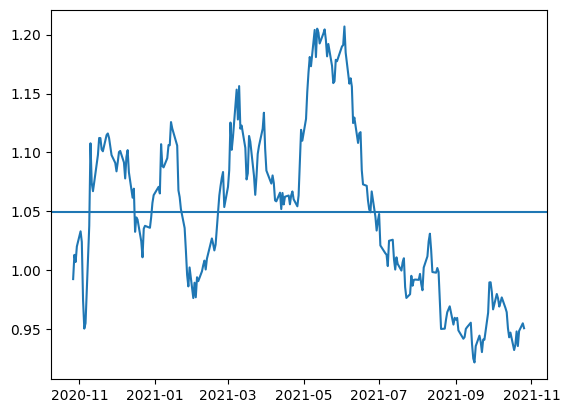

In [7]:

plt.plot(x1/x2)
plt.axhline((x1/x2).mean())